# Distinguishing Sentiments on Twitter

In [1]:
#Identifying working directory in order to locate API key
import os
orig_working_directory=os.getcwd()
orig_working_directory

'C:\\Users\\clemi\\Desktop\\Clementine-GWU-HW\\Python_APIs_and_Sentiment_Analysis\\Twitter-API'

In [2]:
os.chdir(os.path.join('..','..'))
curr_working_directory=os.getcwd()
curr_working_directory

'C:\\Users\\clemi\\Desktop\\Clementine-GWU-HW'

In [6]:
#Importing dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [7]:
# Pulling API keys
from tweet_config import consumer_key,consumer_secret,access_token,access_token_secret

In [9]:
auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api=tweepy.API(auth,parser=tweepy.parsers.JSONParser())

In [10]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [11]:
# Target Search Terms
#BBC, CBS, CNN, Fox, and New York times
target_terms = ["@BBC", "@CBS", "@CNN","@FoxNews", "@nytimes"]

In [ ]:
# "Real Person" Filters
min_tweets = 5
max_tweets = 10000
max_followers = 2500
max_following = 2500

In [12]:
# List to hold sentiments
results_list = []

In [13]:
# Loop through all target users
for target in target_terms:
    news_tweets=api.user_timeline(target,count=100)
    tweet_num=1
    
    # Loop through pages of tweets OR create a cursor
    for tweet in news_tweets:
        results=tweet["text"]
        compound = analyzer.polarity_scores(results)["compound"]
        pos = analyzer.polarity_scores(results)["pos"]
        neg = analyzer.polarity_scores(results)["neg"]
        neu = analyzer.polarity_scores(results)["neu"]
        
        tweets_ago=tweet_num
        # Variables for holding sentiments
        results_list.append({"Source Account":target,
                     "Text":results,
                     "Date":tweet["created_at"],
                     "Compound":compound,
                     "Positive":pos,
                     "Neutral":neu,
                     "Negative":neg,
                     "Tweet Count":tweet_num})
        tweet_num+=1


### Creating DataFrame of API response

In [14]:
df=pd.DataFrame.from_dict(results_list)
#strip the "@" Source account because it does not translate well to the CSV
df["Source Account"]=df["Source Account"].str.lstrip('@')

#sorting the datafram by timestamp
df.sort_values(by=['Date'])
df

,Source Account,Text,Date,Compound,Positive,Neutral,Negative,Tweet Count
0,BBC,Get the tissues ready! 😭\n\n#BillyElliot follo...,Sun May 31 19:01:00 +0000 2020,0.1007,0.157,0.734,0.108,1
1,BBC,#DragonsDen: Best Ever Pitches takes a look at...,Sun May 31 18:01:00 +0000 2020,0.8070,0.263,0.665,0.073,2
2,BBC,I finally have something new to tell my mates ...,Sun May 31 15:01:00 +0000 2020,0.0000,0.000,1.000,0.000,3
3,BBC,"""Just because I can't see, doesn't mean I can'...",Sun May 31 13:01:00 +0000 2020,-0.1695,0.077,0.821,0.103,4
4,BBC,Good to see your mum's taking lockdown well! 👍...,Sun May 31 11:01:00 +0000 2020,0.6476,0.325,0.675,0.000,5
...,...,...,...,...,...,...,...,...
495,nytimes,Breaking News: Students seeking loan forgivene...,Fri May 29 23:10:04 +0000 2020,0.4215,0.192,0.808,0.000,96
496,nytimes,"“We grew up in a traumatic police state, so I ...",Fri May 29 22:50:05 +0000 2020,-0.5719,0.000,0.861,0.139,97
497,nytimes,RT @MikeIsaac: Twitter and Facebook have the s...,Fri May 29 22:40:03 +0000 2020,-0.6249,0.000,0.830,0.170,98
498,nytimes,Read the full complaint: \nhttps://t.co/3ESoiK...,Fri May 29 22:28:27 +0000 2020,-0.2960,0.000,0.645,0.355,99


### Exporting DataFrame to CSV

In [15]:
os.chdir(orig_working_directory)
orig_working_directory

'C:\\Users\\clemi\\Desktop\\Clementine-GWU-HW\\Python_APIs_and_Sentiment_Analysis\\Twitter-API'

In [16]:
df.to_csv("sentiment_analysis.csv",encoding="utf-8")

### Scatter plot of sentiments of the last **100** tweets sent out by each news organization

In [17]:
####https://cmdlinetips.com/2019/04/how-to-specify-colors-to-scatter-plots-in-python/
import seaborn
import seaborn as sns


Text(0, 0.5, 'Tweet Polarity')

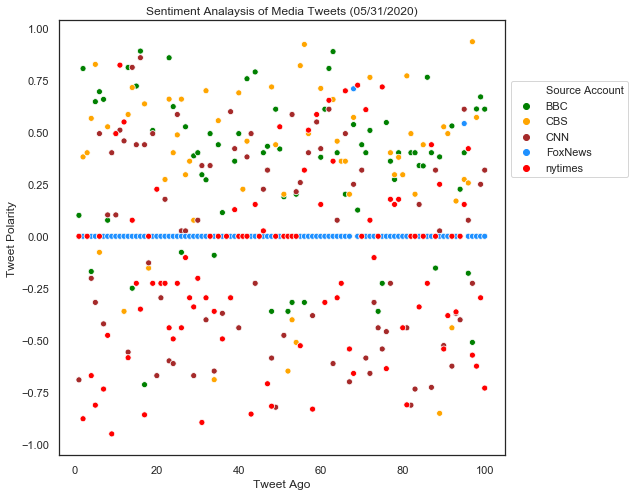

In [20]:
sns.set(style="white")
plt.figure(figsize=(8,8))
analysis=sns.scatterplot(x="Tweet Count",y='Compound',hue="Source Account", data=df,
                palette=['green','orange','brown','dodgerblue','red'],legend='full');

#https://stackoverflow.com/questions/53733755/how-to-move-legend-to-outside-of-a-seaborn-scatterplot/53737271
analysis.legend(loc='center left', bbox_to_anchor=(1.0, 0.75), ncol=1)

analysis.set_title("Sentiment Analaysis of Media Tweets (05/31/2020)")
analysis.set_xlabel('Tweet Ago')
analysis.set_ylabel('Tweet Polarity')

In [21]:
figure = analysis.get_figure()    
figure.savefig("Images/Sentiment_Analysis_scatter.png",bbox_inches='tight')

### Bar plot visualizing the _overall_ sentiments of the last 100 tweets from each organization

In [22]:
analysis_by_source=df.groupby("Source Account")["Compound"].mean()
by_source=pd.DataFrame(analysis_by_source)
by_source=by_source.reset_index()
by_source=by_source.rename(columns={"Compound":"Average Tweet Polarity"})
by_source

,Source Account,Average Tweet Polarity
0,BBC,0.240805
1,CBS,0.208701
2,CNN,-0.038634
3,FoxNews,0.012519
4,nytimes,-0.137668


Text(0.5, 1.0, 'Overall Media Sentiment Based on Twitter (05/31/2020)')

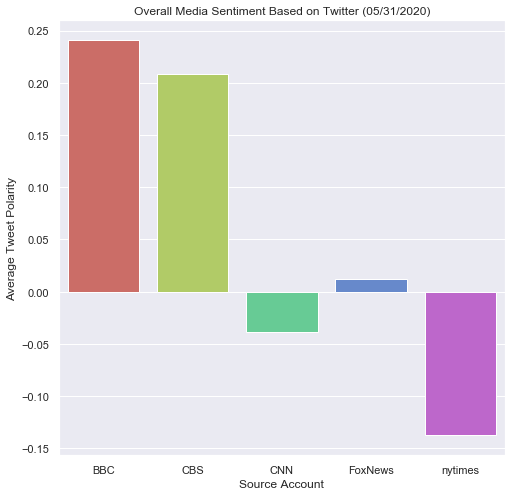

In [24]:
plt.figure(figsize=(8,8))
sns.set(style="darkgrid")
sentiment_bar = sns.barplot(x="Source Account", y="Average Tweet Polarity", data=by_source,palette="hls")
sentiment_bar.set_title("Overall Media Sentiment Based on Twitter (05/31/2020)")

In [25]:
figure = sentiment_bar.get_figure()    
figure.savefig("Images/Sentiment_Analysis_bar.png",bbox_inches='tight')

### Observable trends based on the data

(1)The both the scatter plot and bar chart indicate that Fox News was mostly neutral in tweet polarity in the last 100 tweets        
(2)The bar chart indicates that BBC and CBS on average have more positive tweet polarity in the last 100 tweets                  
(3)The bar chart indicates that CNN and nytimes have more negative tweet polarity in the last 100 tweets
